### <p style='text-align:center;'> Wisconsin Breast Cancer Diagnosis </p> ###

Features of tumor cells along with their labels (benign or malignant) were collected from 569 breast mass samples. The features were computed from digitized image of fine needle aspirate (FNA). </p>

The question to be answered here is: **Can physical characteristics of tumor cells** (ex. size, shape, and compactness) **be indicative of tumor type**; benign or malignant? 

Given that this dataset comes with 30 variables, which are highly correlated, our objective would be to eliminate some variables.  
 

#### The Variables: ####

|Variable Name  |               Description                         |
|:-------- |:--------------------------------------------------:|
| Radius        | Mean of distances from center to points on the perimeter|
| Texture       | A measure of uniformity in the cell nucleus                  |
| Perimeter     |           
| Area          |                         |
| Smoothness |Local variation in radius lengths|
| Compactness |Perimeter² / area — 1.0|
| Concavity |Severity of concave portions of the contour|
| Concave points |Number of concave portions of the contour|
| Symmetry | The symmetry of the nucleus shape |
| Fractal dimension | A measurement of the complexity of the nucleus boundary|


Each of these features is calculated in three ways: mean, standard error (se), and worst. worst is the largest mean value of the feature across the three largest nuclei in the image

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('Wisconsin breast cancer diagnostic.csv')

### Exploratory Data Analysis ###

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
df.shape

(569, 31)

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.duplicated().any()

False

In [9]:
#df.describe(include='all').T

In [3]:
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('id', axis=1, inplace= True)

In [5]:
df.shape

(569, 31)

**! Check Point !**

Let's determine if the dataset is balanced, that is we have balanced proportion of benign to malignant records 

In [20]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [31]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Entries in {column}: {num_unique_values}')

Entries in diagnosis: 2
Entries in radius_mean: 456
Entries in texture_mean: 479
Entries in perimeter_mean: 522
Entries in area_mean: 539
Entries in smoothness_mean: 474
Entries in compactness_mean: 537
Entries in concavity_mean: 537
Entries in concave points_mean: 542
Entries in symmetry_mean: 432
Entries in fractal_dimension_mean: 499
Entries in radius_se: 540
Entries in texture_se: 519
Entries in perimeter_se: 533
Entries in area_se: 528
Entries in smoothness_se: 547
Entries in compactness_se: 541
Entries in concavity_se: 533
Entries in concave points_se: 507
Entries in symmetry_se: 498
Entries in fractal_dimension_se: 545
Entries in radius_worst: 457
Entries in texture_worst: 511
Entries in perimeter_worst: 514
Entries in area_worst: 544
Entries in smoothness_worst: 411
Entries in compactness_worst: 529
Entries in concavity_worst: 539
Entries in concave points_worst: 492
Entries in symmetry_worst: 500
Entries in fractal_dimension_worst: 535


In [32]:
# view features 
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Data Visualization ###

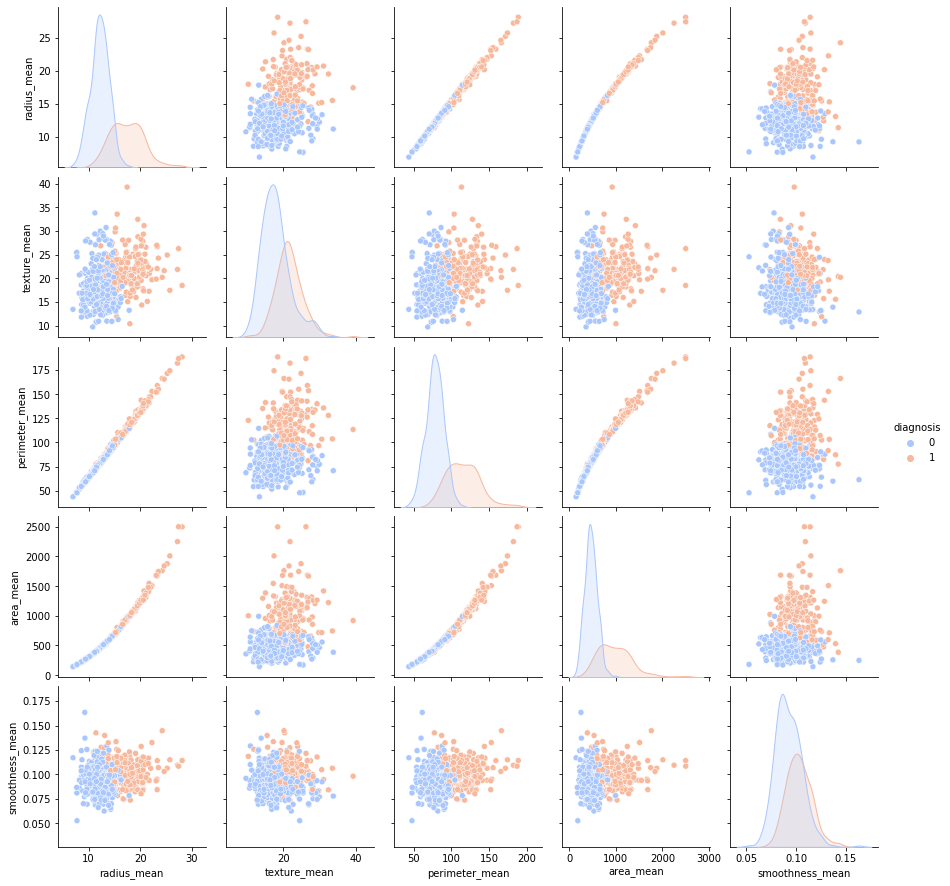

In [52]:
# Convert diagnosis to numeric (0 for B, 1 for M) for better plotting
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# Select a few important features for the pairplot
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']], hue='diagnosis', palette='coolwarm')
plt.show()

C:\Users\maria\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


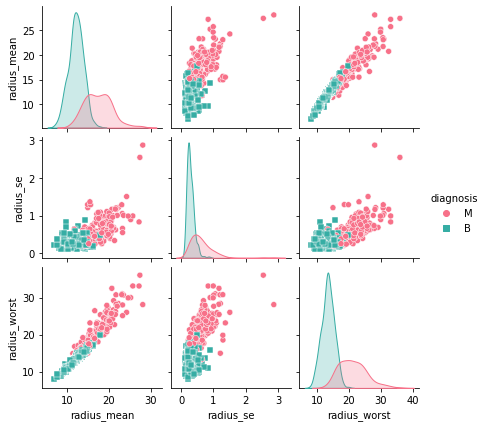

In [37]:
radius = df[['radius_mean','radius_se','radius_worst','diagnosis']]
sns.pairplot(radius, hue='diagnosis',palette="husl", markers=["o", "s"],size=2)

In [4]:
X= df.drop(columns=['diagnosis'])
Y= df['diagnosis']

In [8]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#### Feature Selection ####
_________

1. Using Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier


# Fit the model
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Get feature importance
importances = rf.feature_importances_

# Convert into a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)


                    feature  importance
27     concave points_worst    0.131252
23               area_worst    0.117776
7       concave points_mean    0.115534
22          perimeter_worst    0.111554
20             radius_worst    0.073966
6            concavity_mean    0.071383
0               radius_mean    0.058839
3                 area_mean    0.053810
13                  area_se    0.041212
26          concavity_worst    0.037568
2            perimeter_mean    0.026372
10                radius_se    0.018695
21            texture_worst    0.018637
25        compactness_worst    0.013306
1              texture_mean    0.011725
24         smoothness_worst    0.011023
28           symmetry_worst    0.009908
12             perimeter_se    0.009710
5          compactness_mean    0.008986
19     fractal_dimension_se    0.007133
11               texture_se    0.006897
8             symmetry_mean    0.006874
29  fractal_dimension_worst    0.006515
15           compactness_se    0.006000


#### The most important features are: ####

In [36]:
feature_importance_df[:5]

,feature,importance
27,concave points_worst,0.131252
23,area_worst,0.117776
7,concave points_mean,0.115534
22,perimeter_worst,0.111554
20,radius_worst,0.073966


___

2. Recursive Feature Elimination (RFE)

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a model (you can use other classifiers too)
model = LogisticRegression()

# Apply RFE
rfe = RFE(model, n_features_to_select=5)  # Number of features you want to select
fit = rfe.fit(X_train, Y_train)

# Check selected features
selected_features = X_train.columns[fit.support_]
print("Selected Features:", selected_features)


C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Selected Features: Index(['concavity_mean', 'radius_se', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


Selected Features: 

'concavity_mean'

'radius_se'

'compactness_worst'  

'concavity_worst'  

'concave points_worst'

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Lasso regularization (L1)
lasso = LogisticRegression(penalty='l1', solver='saga', C=0.01)  # Adjust C for regularization strength
lasso.fit(X_train_scaled, Y_train)

# Get coefficients
lasso_coefficients = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso.coef_[0]
}).sort_values(by='coefficient', ascending=False)

#print(lasso_coefficients)

C:\Users\maria\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [46]:
lasso_coefficients[:7]

,feature,coefficient
27,concave points_worst,0.491674
20,radius_worst,0.123019
22,perimeter_worst,0.101983
0,radius_mean,0.000000
1,texture_mean,0.000000
28,symmetry_worst,0.000000
26,concavity_worst,0.000000


### Data Normalization ###

**Min Max Scaling**

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  
X_scaled = scaler.fit_transform(X)  

When to use: *when you know that the data follows a bounded range or you expect the model (e.g., neural networks) to be sensitive to absolute scale.*

**Standaraization (Z-scale)**

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
X_standardized = scaler.fit_transform(X)

When to use: *Standardization is commonly used for models like SVM, k-NN, and logistic regression. It’s helpful when you want to center the data and when features have different units or scales.*

**Robust Scaler**
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()  
X_scaled = scaler.fit_transform(X)

When to use: *When your dataset contains outliers, and you don’t want them to heavily influence the scaling process.*

In [5]:
# Normalizing the data 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

------

Converting the target column to 0 for benign and 1 for malignant. 

In [6]:
y = Y.map({'B': 0, 'M':1})

In [39]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [28]:
#Alternative method for encoding categorical values: 
    
#from sklearn.preprocessing import LabelEncoder
#labelencoder_Y = LabelEncoder()
#Y = labelencoder_Y.fit_transform(Y)

### Modeling and Evaluation ###
-----

In [8]:
# spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**1. Logistic Regression:**

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [14]:
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, y_pred_lr)
lr_conf_matrix = confusion_matrix(Y_test, y_pred_lr)
lr_class_report = classification_report(Y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)
print("Logistic Regression Classification Report:")
print(lr_class_report)

Logistic Regression Accuracy: 0.9650
Logistic Regression Confusion Matrix:
[[90  0]
 [ 5 48]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



In [25]:
X_test.shape

(143, 30)

In [30]:
np.unique(Y_test, return_counts=True)

(array([0, 1], dtype=int64), array([90, 53], dtype=int64))

**2. Random Forest Classifier** 

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(Y_test, y_pred_rf)
rf_class_report = classification_report(Y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest Classification Report:")
print(rf_class_report)

Random Forest Accuracy: 0.9720
Random Forest Confusion Matrix:
[[87  3]
 [ 1 52]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**3. Support Vector Machine Classifier**

In [19]:
from sklearn.svm import SVC

In [20]:
# Train an SVM classifier (with a linear kernel)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

# Predict using the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(Y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(Y_test, y_pred_svm)
svm_class_report = classification_report(Y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("SVM Classification Report:")
print(svm_class_report)

SVM Accuracy: 0.9650
SVM Confusion Matrix:
[[89  1]
 [ 4 49]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



**4. Kernel SVM**

In [21]:
# Train a Kernel SVM classifier (with RBF kernel)
kernel_svm_clf = SVC(kernel='rbf', random_state=42)
kernel_svm_clf.fit(X_train, Y_train)

# Predict using the test set
y_pred_kernel_svm = kernel_svm_clf.predict(X_test)

# Evaluate the Kernel SVM model
kernel_svm_accuracy = accuracy_score(Y_test, y_pred_kernel_svm)
kernel_svm_conf_matrix = confusion_matrix(Y_test, y_pred_kernel_svm)
kernel_svm_class_report = classification_report(Y_test, y_pred_kernel_svm)

print(f"Kernel SVM Accuracy: {kernel_svm_accuracy:.4f}")
print("Kernel SVM Confusion Matrix:")
print(kernel_svm_conf_matrix)
print("Kernel SVM Classification Report:")
print(kernel_svm_class_report)

Kernel SVM Accuracy: 0.9720
Kernel SVM Confusion Matrix:
[[89  1]
 [ 3 50]]
Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



**5. K Nearest Neighbors** 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Train a k-Nearest Neighbors classifier (with k=5 as default)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, Y_train)

# Predict using the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the k-NN model
knn_accuracy = accuracy_score(Y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(Y_test, y_pred_knn)
knn_class_report = classification_report(Y_test, y_pred_knn)

print(f"k-NN Accuracy: {knn_accuracy:.4f}")
print("k-NN Confusion Matrix:")
print(knn_conf_matrix)
print("k-NN Classification Report:")
print(knn_class_report)

k-NN Accuracy: 0.9720
k-NN Confusion Matrix:
[[90  0]
 [ 4 49]]
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.92      0.96        53

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



#### Visualizing the Confusion Matrix ####

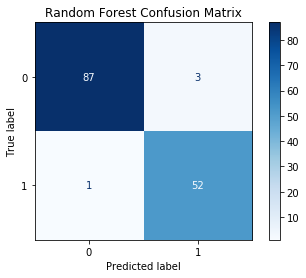

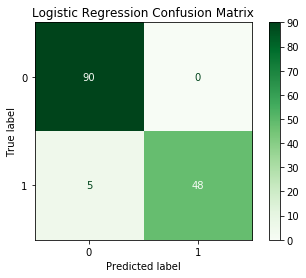

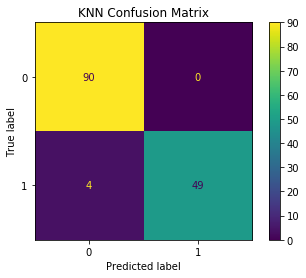

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, Y_test, cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Visualize confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, Y_test, cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, Y_test)
plt.title('KNN Confusion Matrix')
plt.show()

### Conclusion:### 

The accuracy of models performance were: 

* Logistic Regression: 96.5%
* Random Forest: 97.2%
* SVM with kernal 97.2% 
* KNN 97.2%

Looking at the sensitivity and precision of the models, Random Forest wins! All models miss classified between 4-5 patients. But Random Forest had only one false negative compared to 3-5 by other models. False positive is also undersirable, but it should flag the need for further testing or adding more variables such as female's age, family history of cancer, and other contributing factors. 




### More Visualization ### 

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

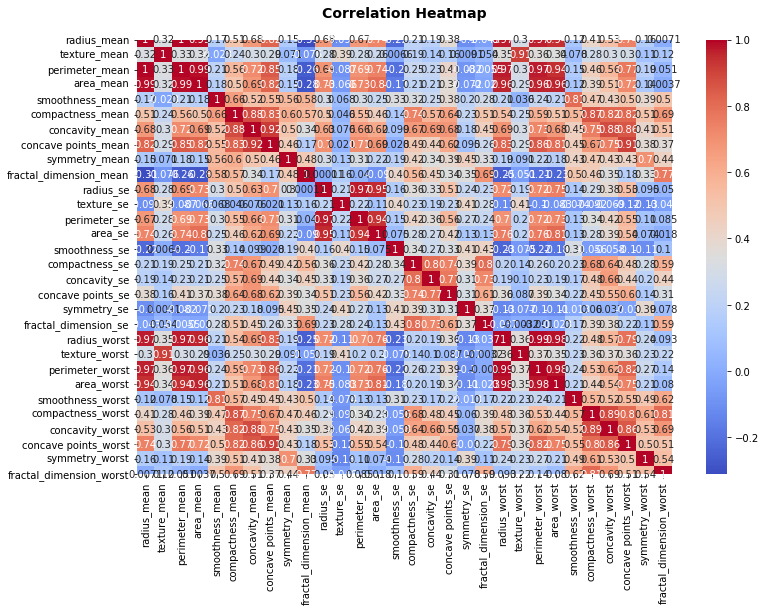

In [26]:
# Heat map of the correlation between measurements 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

Rather than using all the features, let's select only important features 

In [39]:
X_2 = df.drop(columns=['diagnosis'])

In [44]:
X_2.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [48]:
X_3 = X_2[['concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst', 'compactness_se']]

In [49]:
X_3.shape

(569, 5)

In [50]:
Y_new = df['diagnosis']

In [51]:
Y_coded = Y_new.map({'B': 0, 'M': 1})

In [52]:
Y_coded.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [53]:
X_4 = scaler.fit_transform(X_3)

In [54]:
type(X_4), type(X_3)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
YY = labelencoder_Y.fit_transform(Y_new)

#from sklearn.preprocessing import LabelEncoder
#labelencoder_Y = LabelEncoder()
#Y = labelencoder_Y.fit_transform(Y)

In [69]:
len(YY)

569

In [70]:
X_trainn, Y_trainn, X_testt, Y_testt = train_test_split( X_4, YY, test_size=0.2)

In [71]:
len(X_trainn), len(Y_trainn)

(455, 114)

In [72]:
#random_forest_model = RandomForestClassifier()
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_trainn, Y_trainn)

ValueError: Found input variables with inconsistent numbers of samples: [455, 114]

In [ ]:
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(Y_test, y_pred_rf)
rf_class_report = classification_report(Y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("Random Forest Classification Report:")
print(rf_class_report)